#### 필요 모듈 불러오기

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from matplotlib import pyplot as plt

#### 가상 데이터 생성

In [4]:
X = np.linspace(-5,10,500) # -5부터 10까지 등간격으로 500개의 요소를 갖는 벡터
X_2 = X ** 2 # X_2: X의 모든 요소에 제곱이 된 형태 (참고: 유니버설 함수와 브로드캐스팅)

# Y = 3X^2 + e
Y = 3 * X ** 2 + np.random.normal(0, 4, size=len(X)) # Y는 X^2을 바탕으로 생성함 (즉, X와 Y는 자연스레 2차식 관계가 존재)

- np.random.normal(0, 4, size=len(X)): 평균이 0, 표준편차가 4인 sample을 X의 길이만큼 생성하는 정규분포

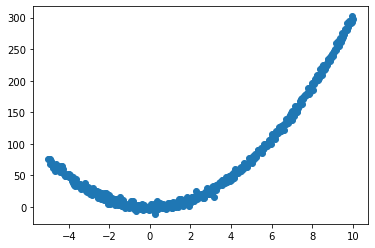

In [6]:
plt.scatter(X, Y)

#### 모델 학습

In [7]:
# X는 1차원이어서 sklearn의 인풋 구조와 맞지 않아, reshape를 사용함
# .fit(X, Y) => X = [[record1], [record2], ..., [record n]]
# 현재 1차원: X = [record1, record2, ..., record n]

# model_1: X의 특징을 그대로 사용한 모델
model_1 = LR().fit(X.reshape(-1,1), Y)

# model_2: X의 제곱을 특징으로 사용한 모델
model_2 = LR().fit(X_2.reshape(-1,1), Y)

#### 모델 적용

In [9]:
# 간단한 예제이기때문에 학습 데이터와 평가 데이터로 나누지않았음

model_1_Y = model_1.predict(X.reshape(-1,1))
model_2_Y = model_2.predict(X_2.reshape(-1,1))
# model_2의 입력도 제곱으로 들어감에 주의

#### 결과 시각화 

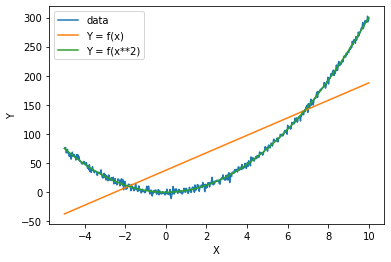

In [13]:
%matplotlib inline

# x축과 y축의 이름 설정
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(X, Y, label='data')
plt.plot(X, model_1_Y, label='Y = f(x)')
plt.plot(X, model_2_Y, label='Y = f(x**2)')

plt.legend(loc='best')